# Notebook 10: High Res Tracing Stars Around Annulus 

This notebook will  be exploring the young stars in the h329 galaxy at the present day redshift. We will be looking at an annulus of 19-21 kpc and trying to trace how stellar age populations shift in the galaxy location-wise.

## Setup 

In [1]:
import astropy

import matplotlib.pyplot as plt
import h5py
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

In [2]:
plt.style.use('bmh')

In [3]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096'
## We are using 4096 present day timestep and simulation data with only gas and star particles

h329, h329_h, h329_h1 = sim_setup(path_to_h329)

loading sim
doing units
selecting halos
making faceon


In [4]:
## Setting up disk filter 

radius_d = 30
height_d = 2 ## thickness height is centered on the center defined below
center_d = (0,0,0)

## sphere filter and stars
f_sphere = pynbody.filt.Sphere(radius_d, center_d)
h329_s_sphere = h329.s[f_sphere]

pynbody.analysis.angmom.faceon(h329_s_sphere)

## disk filter and stars
f_disk = pynbody.filt.Disc(radius_d, height_d, center_d)
h329_s_disk = h329_s_sphere[f_disk]


In [5]:
## Now setting up vertical profiles using our filters (created in cell above) on h329 galaxy

h329_p_s_vert_sliced = profile.VerticalProfile(h329_s_disk, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_sliced = pynbody.analysis.profile.Profile(h329_s_disk, vmin =.01) ## radial profile

## Background

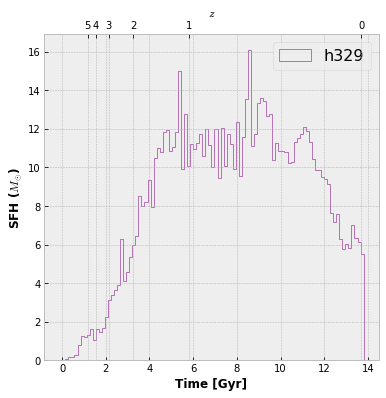

In [6]:
## Star formation history (background plot)

fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329_s_disk,bins=100, color='purple', label = 'h329')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFH ($M_{\odot}$)', fontweight='bold')
plt.tick_params(axis='both', which='major')

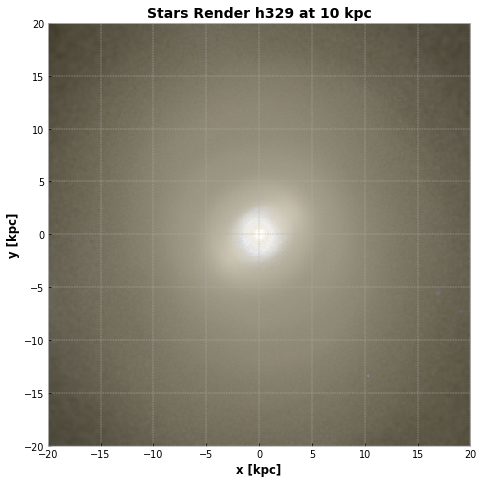

In [7]:
## Face-on render of the h329 galaxy at present day 

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_s_disk, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 at 10 kpc', fontweight='bold');

## Profiles

### Radius Versus Age and Radius Versus Stellar Metallicity Plots

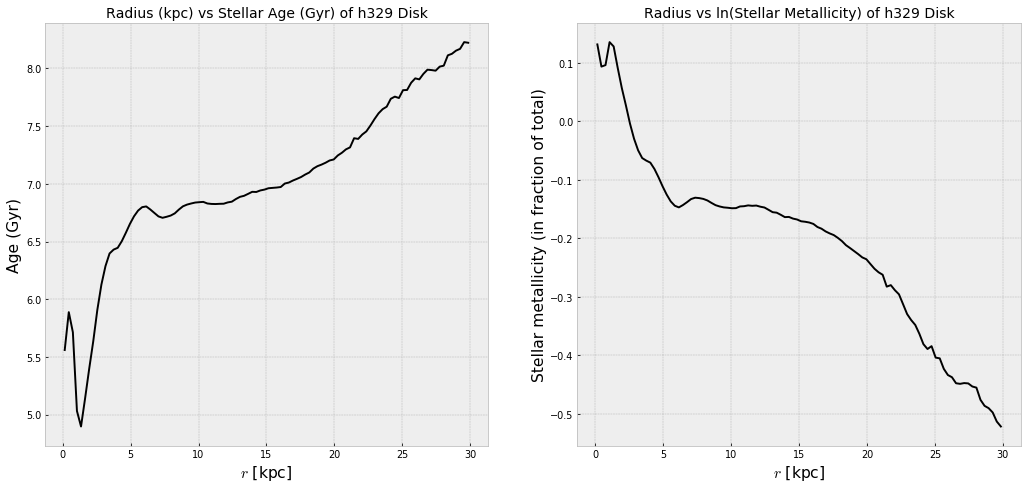

In [7]:
## Radius versus Age/Metallicity
## Calling on 'feh' for stellar metallicity data

fig, axs = plt.subplots(1, 2, figsize=[18, 8], dpi=70)

axs[0].plot(h329_p_s_sliced['rbins'].in_units('kpc'), h329_p_s_sliced['age'].in_units('Gyr'),'k') 
axs[0].set_xlabel('$r$ [kpc]', fontsize=16)
axs[0].set_ylabel(r'Age (Gyr)', fontsize=16)
axs[0].set_title('Radius (kpc) vs Stellar Age (Gyr) of h329 Disk')

axs[1].plot(h329_p_s_sliced['rbins'].in_units('kpc'), h329_p_s_sliced['feh'],'k') 
## np.log function means natural log!
axs[1].set_xlabel('$r$ [kpc]', fontsize=16)
axs[1].set_ylabel(r'Stellar metallicity (in fraction of total)', fontsize=16)
axs[1].set_title('Radius vs ln(Stellar Metallicity) of h329 Disk');

In these plots we notice that trends are what we expect. As the radius increases the age tends to increase a bit, and with increase in radius/age, the metallicity tends to decrease. So younger stars are more metal-rich whereas the older ones are more metal-poor.

### Now Making Annulus Around 20 kpc 

In [6]:
## Def edges of annulus
inner_rad = '19 kpc'
outer_rad = '21 kpc'

## Annulus Filter
f_annulus = pynbody.filt.Annulus(inner_rad, outer_rad, center_d) ## center_d defined earlier as (0,0,0)

## h329 sim of stars in disk around the annulus filter
h329_s_ann = h329_s_disk[f_annulus]

## New radial profile with annulus
h329_p_s_sliced_ann = pynbody.analysis.profile.Profile(h329_s_ann, vmin =.01)

## Tracing Stars in Annulus Using Bridges

We are setting up a new snapshot of the h329 galaxy just a little bit before present day. Using this snapshot we will trace the stars within a certain annulus in present day, and see where they came from (within the galaxy) at a previous time. This will help us understand how and where stellar migration is happening. 

As we will see below, this procedure works really well! So in the following notebook we will expand and during a couple other annuli and trace where those stars are coming from.

Using bridges to trace between snapshots. See more about it here: https://pynbody.github.io/pynbody/tutorials/bridge.html

In [7]:
## Pathway to the simulation galaxy data from 4032 timestep (z=0.1 ish)

path_to_h329_4032 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004032'
## We are using 4032 

h329_4032, h329_h_4032, h329_h1_4032 = sim_setup(path_to_h329_4032)

loading sim
doing units
selecting halos
making faceon


They say "f1 and f2" in bridges documentation. Mine are called "h329 and h329_4032".

In [8]:
## Creating the bridge object

bridge = h329.bridge(h329_4032)

In [9]:
progenitor_particles = bridge(h329_s_ann) ## this is where the 4096 particles are that we selected, but in the 4032 snapshot

In [10]:
## the radial profile of the progenitor particles (of the stars in the original present day annulus)

h329_p_s_progen = pynbody.analysis.profile.Profile(progenitor_particles.s, vmin =.01)

## R v Age of Progenitor Particles

/home1/09216/mmiller1/.local/lib/python3.7/site-packages/pynbody/analysis/profile.py:379: RuntimeWarning: invalid value encountered in double_scalars
  result[i] = (name_array * mass_array).sum() / self['weight_fn'][i]


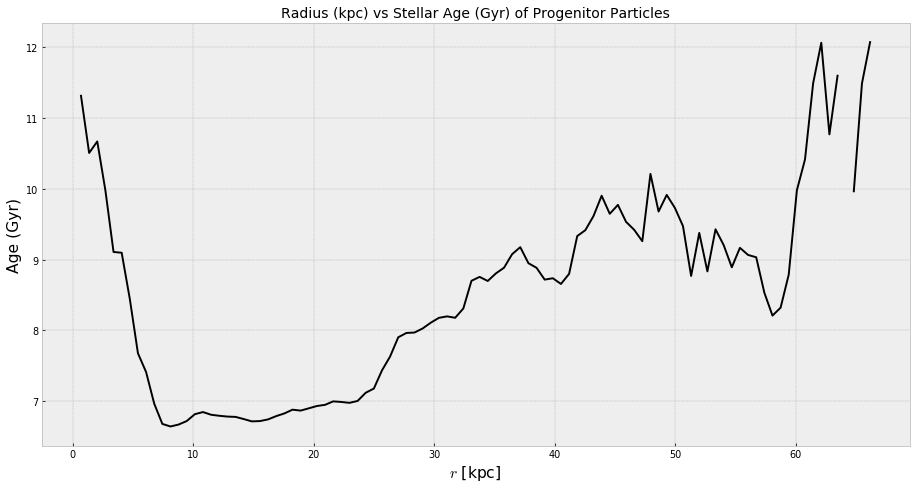

In [11]:
## r v age for progenitor_particles made from annulus and stars in h329

fig, axs = plt.subplots(1, 1, figsize=[16, 8], dpi=70)

plt.plot(h329_p_s_progen['rbins'].in_units('kpc'), h329_p_s_progen['age'].in_units('Gyr'),'k') 
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel(r'Age (Gyr)', fontsize=16)
plt.title('Radius (kpc) vs Stellar Age (Gyr) of Progenitor Particles');

So, this graph tells us theres a wide range of stars coming in, and that the stars that end up within 19-21 kpc at present day, may vary in age from ~ 6.7-12 Gyrs. 

## Filtering so Shapes are Equal

Within the difference in time between the 4032 (previous timestep) snapshot and the 4096 snapshot there are a couple new stars that are formed. This is normal, but we need to filter them out to be able to make graphs otherwise the shapes are the same and we can't compare the migration of stars (since the new ones did not exist in the previous timestep).

In [11]:
## diff shapes need to be filtered

progenitor_particles.s, h329_s_ann

(<SimSnap "/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004032:indexed::star" len=271057>,
 <SimSnap "/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096::star:sphere:disc:annulus" len=271059>)

As seen above at the end where it says "len=" the numbers are different - so we need to filter out the present day data so that anything created after the 4032 snapshot is filtered out.

In [12]:
## Set the filtering time to the time of the 4032 timestep

time_1 = h329_4032.properties['time']

In [13]:
## Now filter out the ones created between 4032 and present day timesteps

new_h329_s_ann = h329_s_ann[h329_s_ann['tform'] < time_1]
new_h329_s_ann

<SimSnap "/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096::star:sphere:disc:annulus:indexed" len=271057>

Now we can see above that the lengths are the same!

## R v Mass of Progenitor Particles

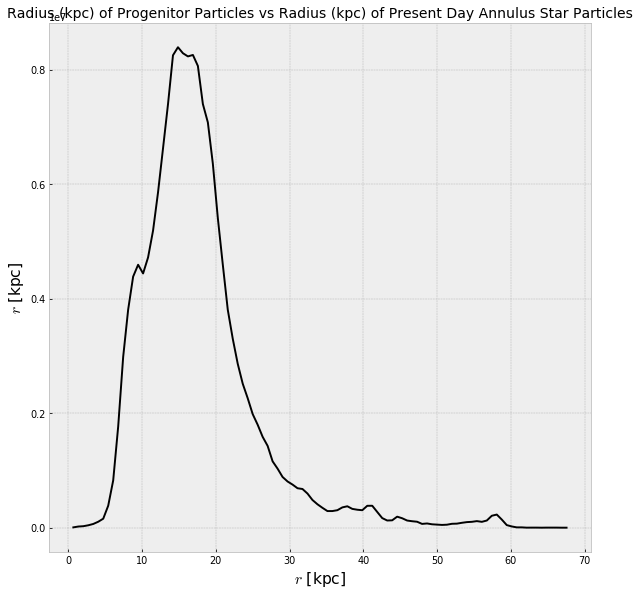

In [12]:
## r v mass for progenitor_particles made from annulus and stars in h329

fig, axs = plt.subplots(1, 1, figsize=[10,10], dpi=70)

plt.plot(h329_p_s_progen['rbins'].in_units('kpc'), h329_p_s_progen['mass'].in_units('Msol'),'k') ## using progenitor particles radial profile here
plt.xlabel('$r$ [kpc]', fontsize=16)
plt.ylabel('$mass$ [Msol]', fontsize=16)
plt.title('Radius (kpc) of Progenitor Particles vs Radius (kpc) of Present Day Annulus Star Particles');

This graph shows us the majority of the stellar mass which has migrated to the 19-21 kpc range, was originally slightly more inward around approximately 14-18 kpc. Eventually all that mass, by present day, is located within 19-21 kpc.

## Stellar Render of Progenitor Particles

Let's look at what the stars migrating into the 19-21 kpc range look like.

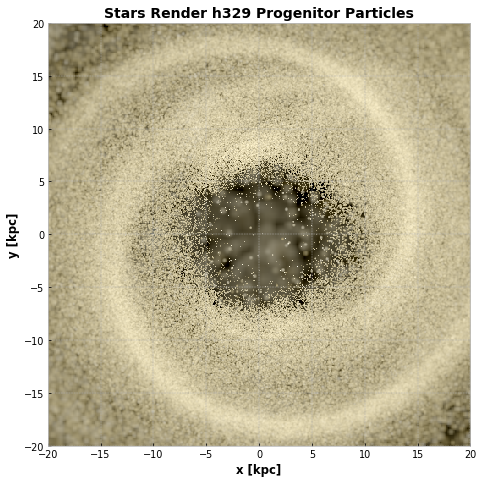

In [25]:
## Face-on image of present day pregenitor particles

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(progenitor_particles, width = '40 kpc', dynamic_range = 4)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 Progenitor Particles', fontweight='bold');

This picture is super interesting because we can directly see the spiral structure within the progenitor particles. This sprial structure eventually all moves outward to the 19-21 kpc range. It's important to check now whether this spiraling can be seen within other annuli (so we make sure we didn't just get lucky).

## Stellar Renders of all of h329 (4032 - Previous Timestep)

We want to get an image of the enture h329 4032 snapshot to see how well we could normally pick out the spiral structure if we were looking at all the stars in the simulation.

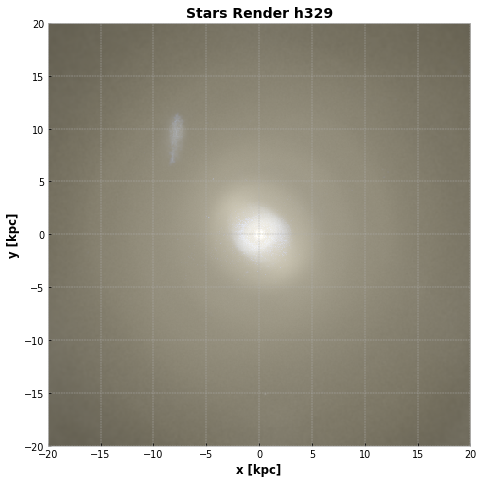

In [15]:
## Face on stellar render of all stars in the h329 galaxy 4032 snapshot

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_4032.s, width = '40 kpc', dynamic_range = 8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329', fontweight='bold');

Text(0.5, 1.0, 'Stars Render h329 SIDE-ON (after slicing)')

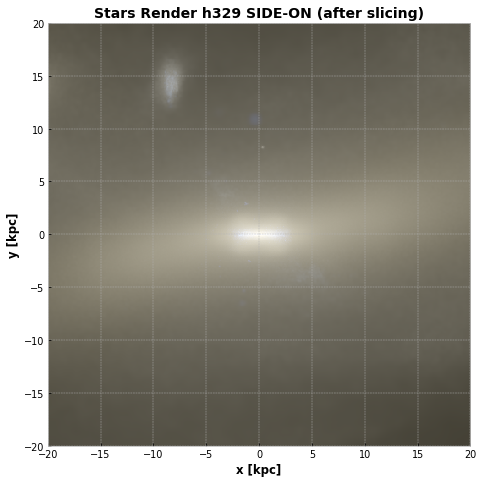

In [11]:
## Side on picture of all stars in h329 4032

pynbody.analysis.angmom.sideon(h329_4032.s)

fig = plt.figure(figsize=[8, 8], dpi=70)

pynbody.plot.stars.render(h329_4032.s, width = '40 kpc', dynamic_range=8)
plt.xlabel('x [kpc]', fontweight='bold')
plt.ylabel('y [kpc]', fontweight='bold')
plt.tick_params(axis='both', which='major')
plt.title('Stars Render h329 SIDE-ON (after slicing)', fontweight='bold')

The little blip in the first picture on the outer part is present in the side-on but up further above the plane of the main galaxy disk.

## Exploring Velocity Dispersion in h329 4032 Timestep

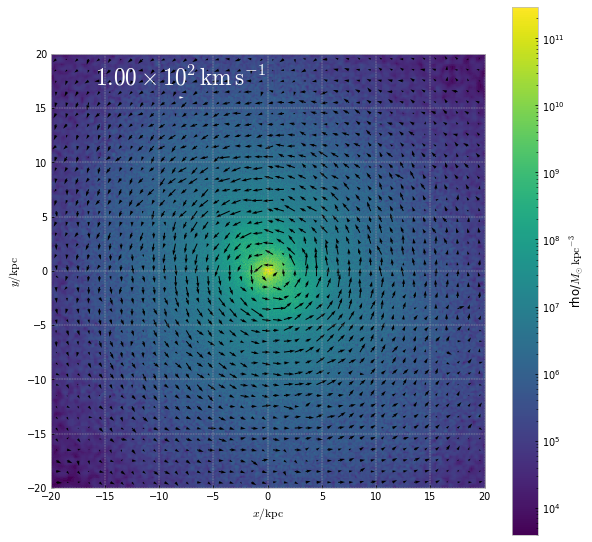

In [17]:
## Velocity Image of h329 at time step 4032 with velocity arrows

fig = plt.figure(figsize=[10, 10], dpi=70)

pynbody.plot.sph.velocity_image(h329_4032.s, width='40 kpc', vector_color='black');

This is not a super helpful representation of the velocity dispersion since there are so many arrows and lines. Let's look at a profile below instead.

### R v VZ_DISP for Progenitor Particles 

Looking at the velocity dispersion within the progenitor particles.

/home1/09216/mmiller1/.local/lib/python3.7/site-packages/pynbody/analysis/profile.py:360: RuntimeWarning: invalid value encountered in double_scalars
  self['weight_fn'][i]
/home1/09216/mmiller1/.local/lib/python3.7/site-packages/pynbody/analysis/profile.py:362: RuntimeWarning: invalid value encountered in double_scalars
  (name_array * mass_array).sum() / self['weight_fn'][i]) ** 2


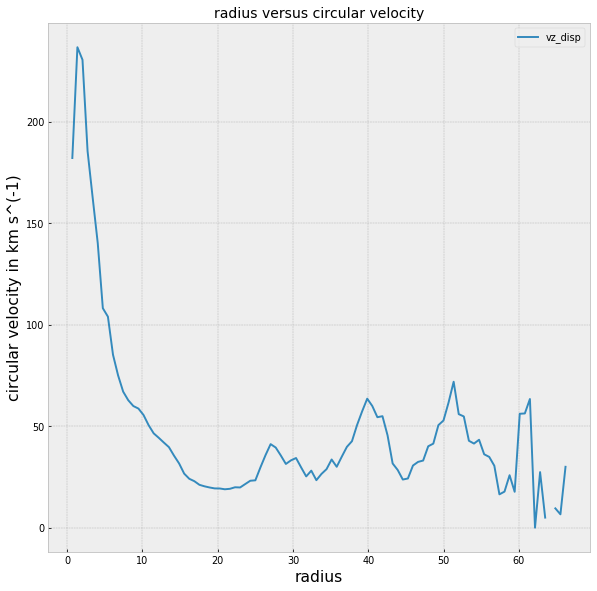

In [16]:
## graphing r versus velocity dispersion of the h329 progenitor particles that are moving to the original annuli

fig, axs = plt.subplots(figsize=[10, 10], dpi=70)

plt.plot(h329_p_s_progen['rbins'].in_units('kpc'), h329_p_s_progen['vz_disp'].in_units('km s**-1'), label='vz_disp')

plt.xlabel('radius', fontsize=16)
plt.ylabel('circular velocity in km s^(-1)', fontsize=16)
plt.title('radius versus circular velocity')
plt.legend();

# End

We have explored the annulus 19-21 kpc and found interesting migration patterns within the progenitor particles. In notebook 11 we detour a bit to look at another galaxy (h243) and their scale lengths. Within that notebook there are similar trends to what we have seen with h329's scale lengths. Notebook 12 will then continue with exploring other annuli and graphing progenitor particle behaviors.